### Day 9 — Handling Outliers (IQR)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### 1. Create a sample dataset with outliers

In [2]:
data = {
    'Age': [22, 25, 24, 23, 120, 26, 27, 21, 200, 24],
    'Salary': [30000, 32000, 31000, 30500, 400000, 33000, 34000, 29500, 500000, 31000]
}

In [3]:
df = pd.DataFrame(data)
print("Original Dataset with Outliers:")
print(df)

Original Dataset with Outliers:
   Age  Salary
0   22   30000
1   25   32000
2   24   31000
3   23   30500
4  120  400000
5   26   33000
6   27   34000
7   21   29500
8  200  500000
9   24   31000


##### 2. Visualize outliers using boxplot


Generating boxplots…


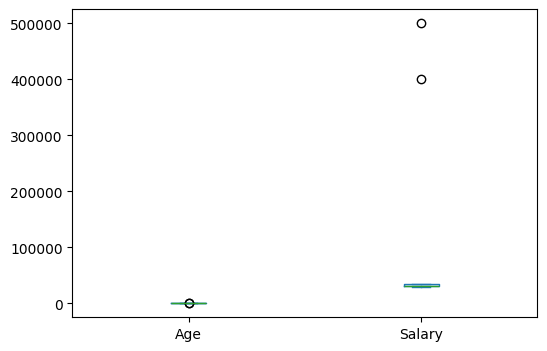

In [4]:
print("\nGenerating boxplots…")
df.plot(kind='box', figsize=(6, 4))
plt.show()

##### 3. Detecting Outliers Using IQR

In [5]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [6]:
print("\nQ1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)


Q1:
 Age          23.25
Salary    30625.00
Name: 0.25, dtype: float64

Q3:
 Age          26.75
Salary    33750.00
Name: 0.75, dtype: float64

IQR:
 Age          3.5
Salary    3125.0
dtype: float64


In [7]:
# Lower & Upper Bound
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [8]:
print("\nLower Bound:\n", lower)
print("\nUpper Bound:\n", upper)


Lower Bound:
 Age          18.0
Salary    25937.5
dtype: float64

Upper Bound:
 Age          32.0
Salary    38437.5
dtype: float64


In [9]:
# Filtering outliers
iqr_outliers = df[(df < lower) | (df > upper)]
print("\nIQR Detected Outliers:\n", iqr_outliers.dropna(how='all'))


IQR Detected Outliers:
      Age    Salary
4  120.0  400000.0
8  200.0  500000.0


In [10]:
# Remove IQR outliers
df_iqr_clean = df[~((df < lower) | (df > upper)).any(axis=1)]
print("\nDataset after removing IQR outliers:")
print(df_iqr_clean)


Dataset after removing IQR outliers:
   Age  Salary
0   22   30000
1   25   32000
2   24   31000
3   23   30500
5   26   33000
6   27   34000
7   21   29500
9   24   31000
